In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Importing the data
df_credit = pd.read_csv("/german_credit_data.csv",index_col=0)

In [ ]:
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [ ]:
print(df_credit.nunique())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


In [ ]:
print('Total number of people with risk score:')
print(df_credit.Risk.count())

Total number of people with risk score:
1000


In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter

trace0 = go.Bar(
            x = df_credit[df_credit["Risk"]== 'good']["Risk"].value_counts().index.values,
            y = df_credit[df_credit["Risk"]== 'good']["Risk"].value_counts().values,
            name='Good credit'
    )

trace1 = go.Bar(
            x = df_credit[df_credit["Risk"]== 'bad']["Risk"].value_counts().index.values,
            y = df_credit[df_credit["Risk"]== 'bad']["Risk"].value_counts().values,
            name='Bad credit'
    )

data = [trace0, trace1]

layout = go.Layout(

)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Risk Variable'
    ),
    title='Risk variable distribution(Target value)'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')


In [ ]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
df_good = df_credit.loc[df_credit["Risk"] == 'good']['Age'].values.tolist()
df_bad = df_credit.loc[df_credit["Risk"] == 'bad']['Age'].values.tolist()
df_age = df_credit['Age'].values.tolist()


fig1_1= go.Histogram(x=df_good,histnorm='percent',name="Good Credit")

fig1_2= go.Histogram(x=df_bad, histnorm='percent',name="Bad Credit",autobinx=False)

fig1_3= go.Histogram(x=df_age,histnorm='percent',name="Overall Age")

fig = tls.make_subplots(rows=2, cols=2,subplot_titles=('Good Credit Percentage','Bad Credit Percentage', 'General Distribuition'))


fig.append_trace(fig1_1, 1, 1)
fig.append_trace(fig1_2, 1, 2)
fig.append_trace(fig1_3, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='A1')

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



<bound method Figure.tight_layout of <Figure size 1200x800 with 1 Axes>>

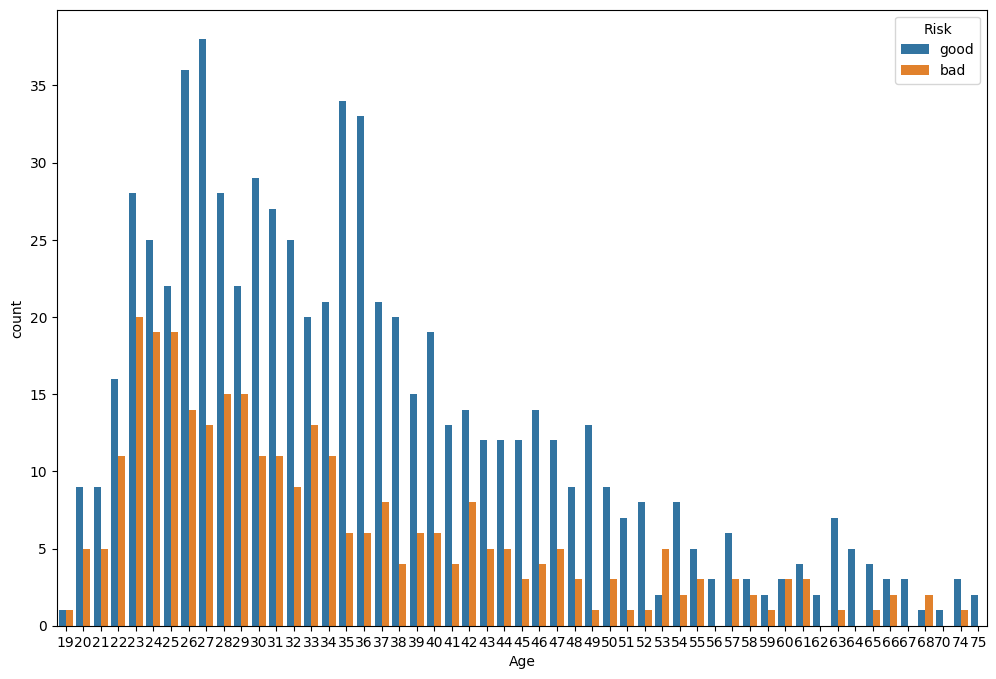

In [ ]:
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']


fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x="Age", hue="Risk", data=df_credit)
fig.tight_layout

In [ ]:
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


<bound method Figure.tight_layout of <Figure size 1200x800 with 1 Axes>>

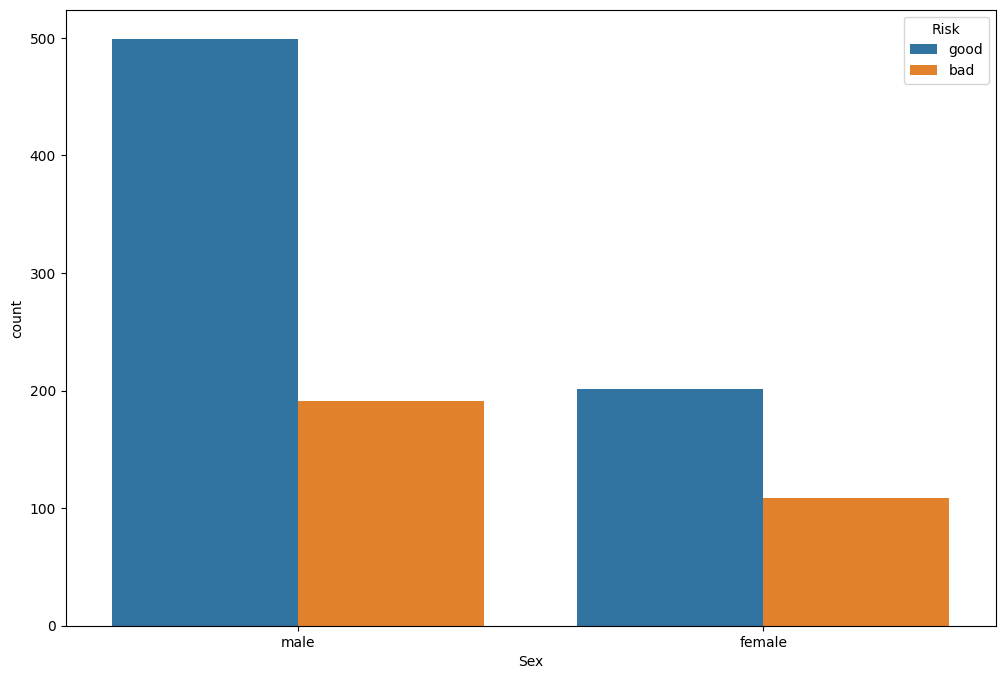

In [ ]:
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']


fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x="Sex", hue="Risk", data=df_credit)
fig.tight_layout

<bound method Figure.tight_layout of <Figure size 1200x800 with 1 Axes>>

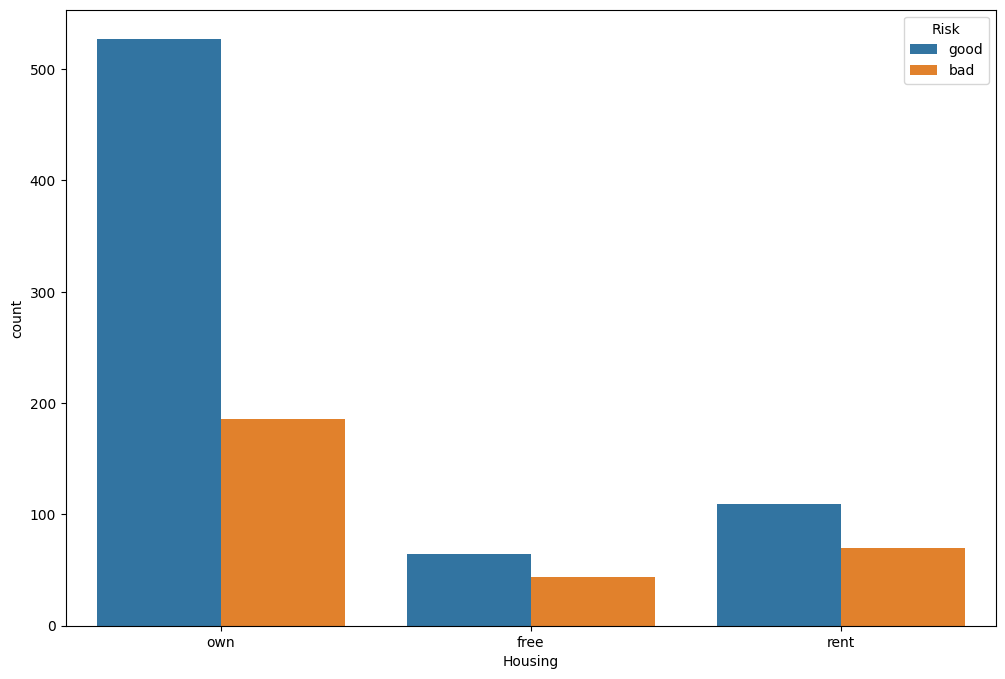

In [ ]:
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']


fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x="Housing", hue="Risk", data=df_credit)
fig.tight_layout

<bound method Figure.tight_layout of <Figure size 1200x800 with 1 Axes>>

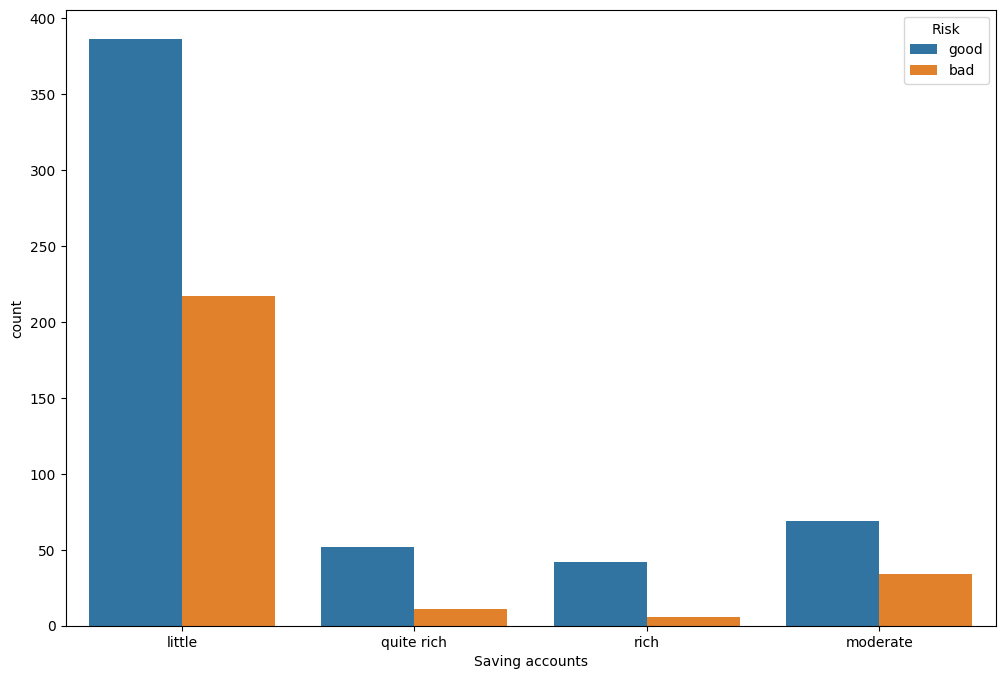

In [ ]:
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']


fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x="Saving accounts", hue="Risk", data=df_credit)
fig.tight_layout

Total values of the most missing variable: 
Checking account
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64


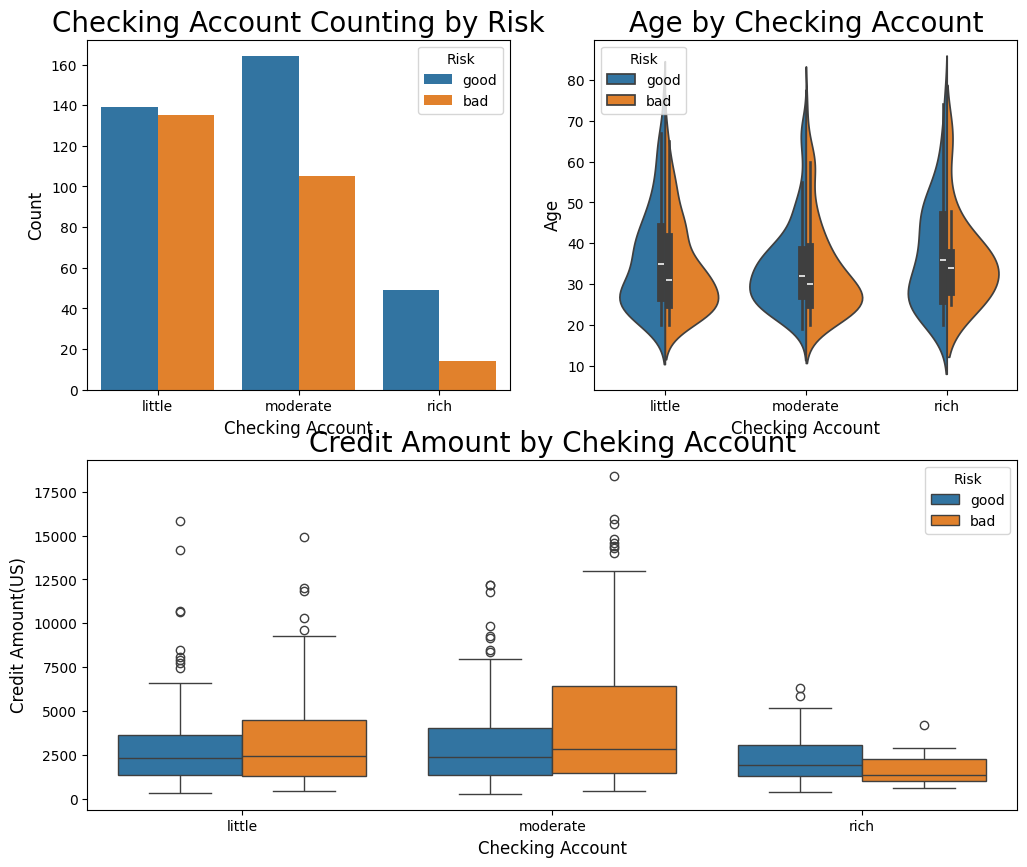

In [ ]:
print("Total values of the most missing variable: ")
print(df_credit.groupby("Checking account")["Checking account"].count())

plt.figure(figsize = (12,10))

g = plt.subplot(221)
g = sns.countplot(x="Checking account", data=df_credit, hue="Risk")
g.set_xlabel("Checking Account", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Checking Account Counting by Risk", fontsize=20)

g1 = plt.subplot(222)
g1 = sns.violinplot(x="Checking account", y="Age", data=df_credit, hue = "Risk",split=True)
g1.set_xlabel("Checking Account", fontsize=12)
g1.set_ylabel("Age", fontsize=12)
g1.set_title("Age by Checking Account", fontsize=20)

g2 = plt.subplot(212)
g2 = sns.boxplot(x="Checking account",y="Credit amount", data=df_credit,hue='Risk')
g2.set_xlabel("Checking Account", fontsize=12)
g2.set_ylabel("Credit Amount(US)", fontsize=12)
g2.set_title("Credit Amount by Cheking Account", fontsize=20)



plt.show()
plt.show()

<bound method Figure.tight_layout of <Figure size 1200x800 with 1 Axes>>

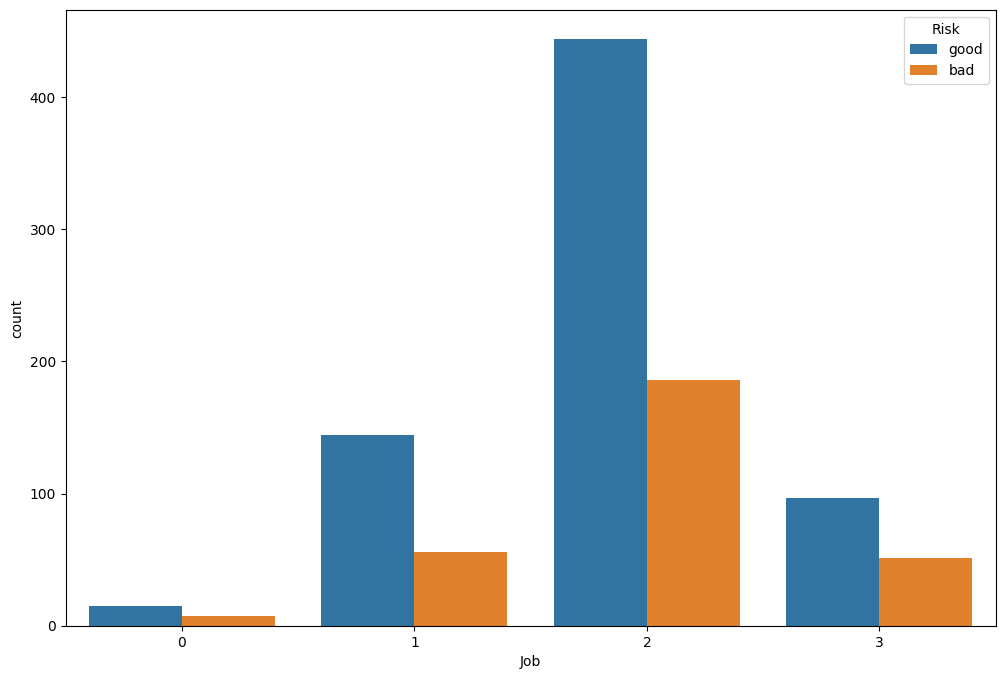

In [ ]:
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']


fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x="Job", hue="Risk", data=df_credit)
fig.tight_layout

<bound method Figure.tight_layout of <Figure size 1200x800 with 1 Axes>>

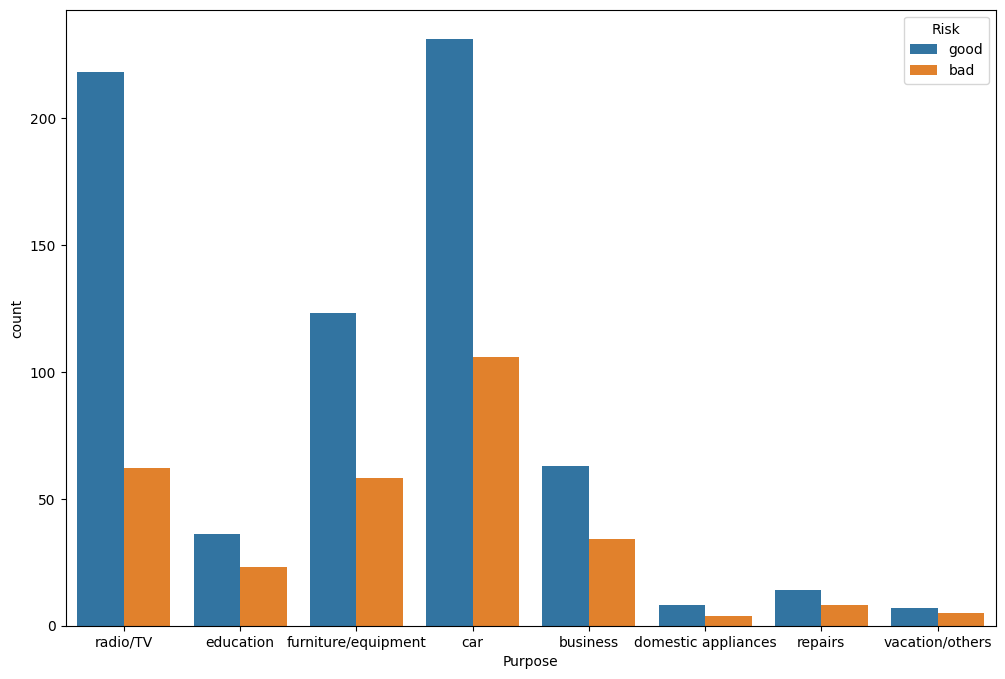

In [ ]:
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']


fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x="Purpose", hue="Risk", data=df_credit)
fig.tight_layout

In [ ]:
age_intervals = (18, 25, 35, 60)

groups = ['Kids(upto 18)', 'Young Adults', 'Adults']
df_credit["Age_cat"] = pd.cut(df_credit.Age, age_intervals, labels=groups)


df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

In [ ]:
trace0 = go.Box(
    y=df_good["Credit amount"],x=df_good["Age_cat"],name='Good credit')

trace1 = go.Box(y=df_bad['Credit amount'],x=df_bad['Age_cat'],name='Bad credit')

data = [trace0, trace1]

layout = go.Layout(yaxis=dict(title='Credit Amount (USD)',zeroline=False),xaxis=dict(title='Age Categorical'),
    boxmode='group')

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

In [ ]:
date_int = ["Purpose", 'Sex']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_credit[date_int[0]], df_credit[date_int[1]]).style.background_gradient(cmap = cm)

Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


In [ ]:
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [ ]:
df_credit['Saving accounts'] = df_credit['Saving accounts'].fillna('no_inf')
df_credit['Checking account'] = df_credit['Checking account'].fillna('no_inf')

df_credit = df_credit.merge(pd.get_dummies(df_credit.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
df_credit = df_credit.merge(pd.get_dummies(df_credit.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
df_credit = df_credit.merge(pd.get_dummies(df_credit.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
df_credit = df_credit.merge(pd.get_dummies(df_credit["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
df_credit = df_credit.merge(pd.get_dummies(df_credit.Risk, prefix='Risk'), left_index=True, right_index=True)
df_credit = df_credit.merge(pd.get_dummies(df_credit["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
df_credit = df_credit.merge(pd.get_dummies(df_credit["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

In [ ]:
del df_credit["Saving accounts"]
del df_credit["Checking account"]
del df_credit["Purpose"]
del df_credit["Sex"]
del df_credit["Housing"]
del df_credit["Age_cat"]
del df_credit["Risk"]
del df_credit['Risk_good']

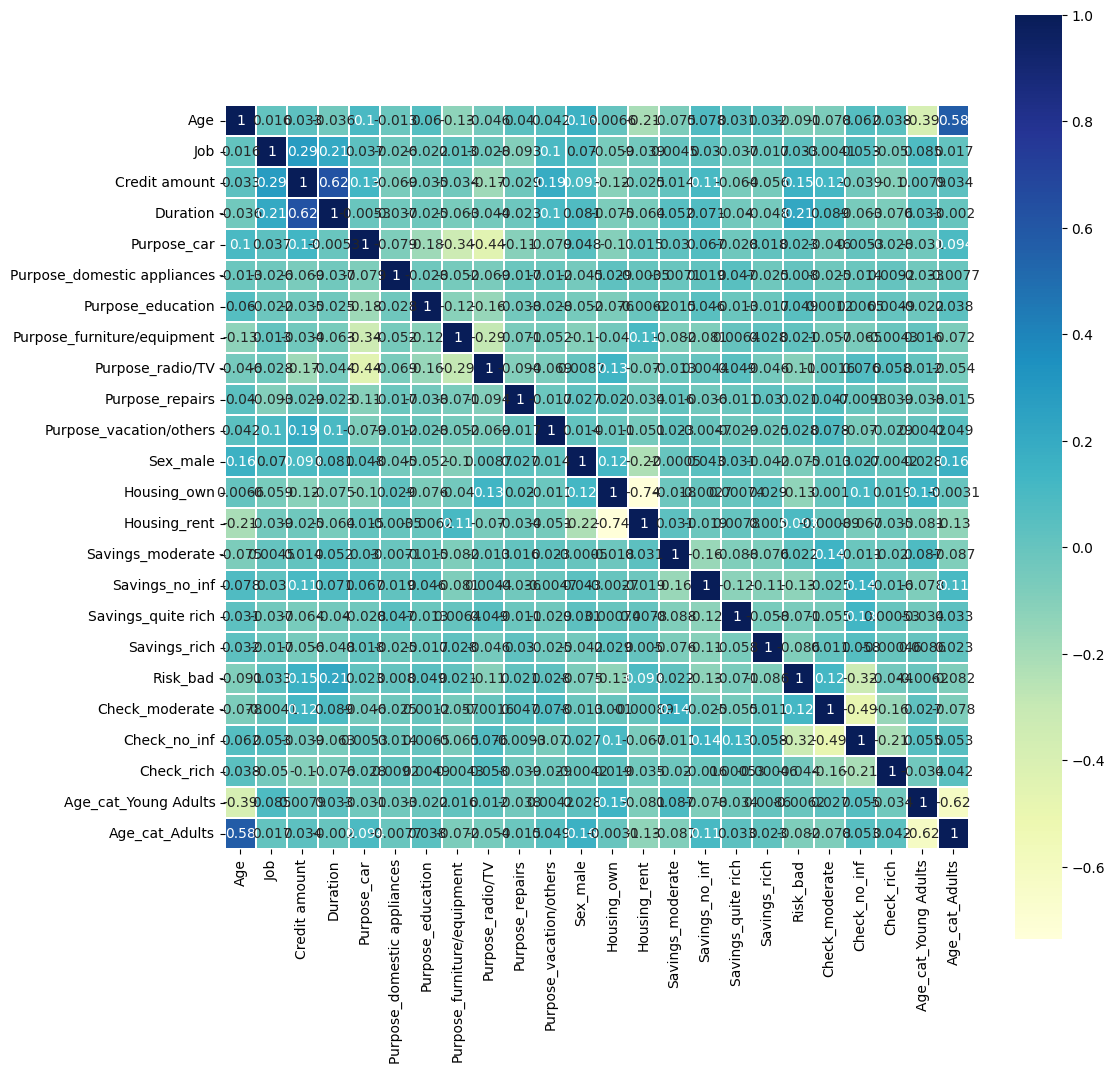

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df_credit.astype(float).corr(),linewidths=0.1,cmap = 'YlGnBu',vmax=1.0, square=True,  linecolor='white', annot=True)
plt.show()